##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***

---
(*In Title case, separated with commas*)
***Full names of all students in the team:***

---
(*Separated by commas*)
***Id number of all students in the team:***


# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [14]:
# %pip install sdv
# %pip uninstall urllib3 --y
# %pip install urllib3==1.26.7
# exit()

In [15]:
import pandas as pd
import numpy as np
from sdv.lite import SingleTablePreset
from sdv.metadata import SingleTableMetadata
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings

In [16]:
# how to ignore warnings
warnings.filterwarnings('ignore')

In [17]:
real_data=pd.read_excel("diabetes2.xlsx")

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

Synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)

Synthesizer.fit(
    data=real_data
)

Synthetic_data = Synthesizer.sample(
    num_rows=1000
)
Synthetic_data.to_csv("Generated_data")



In [18]:
df = pd.read_csv("Generated_data")
df

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,4,151,78,10,65,36.280343,0.664665,45,1
1,1,4,104,101,24,29,37.394831,0.078000,27,0
2,2,3,109,93,36,265,21.725647,0.348009,31,1
3,3,5,86,47,12,108,25.372657,0.763315,22,1
4,4,1,101,26,32,68,32.259080,0.325648,29,0
...,...,...,...,...,...,...,...,...,...,...
995,995,1,131,40,34,247,34.077538,0.745716,30,1
996,996,6,162,35,33,173,35.634756,0.078000,38,0
997,997,4,87,66,27,141,20.538039,0.581174,36,0
998,998,7,158,85,45,140,33.499651,0.583793,34,1


# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [19]:
# Read the data
Synthetic_data = pd.read_csv(r"Generated_data")

In [20]:
Synthetic_data.describe()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,4.032000,121.606000,69.262000,21.346000,99.495000,31.498513,0.496183,34.021000,0.375000
std,288.819436,3.002331,31.207863,20.028492,14.827614,91.902939,8.099266,0.307900,10.244975,0.484365
min,0.000000,0.000000,24.000000,8.000000,0.000000,0.000000,2.326626,0.078000,21.000000,0.000000
25%,249.750000,2.000000,100.000000,56.000000,10.000000,10.000000,25.969422,0.229314,25.000000,0.000000
50%,499.500000,4.000000,121.000000,69.500000,20.000000,85.000000,31.620899,0.478947,33.000000,0.000000
75%,749.250000,6.000000,142.000000,83.000000,31.000000,161.000000,36.853491,0.711405,42.000000,1.000000
max,999.000000,17.000000,199.000000,122.000000,74.000000,494.000000,54.677124,1.600600,68.000000,1.000000


In [21]:
Synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Pregnancies               1000 non-null   int64  
 2   Glucose                   1000 non-null   int64  
 3   BloodPressure             1000 non-null   int64  
 4   SkinThickness             1000 non-null   int64  
 5   Insulin                   1000 non-null   int64  
 6   BMI                       1000 non-null   float64
 7   DiabetesPedigreeFunction  1000 non-null   float64
 8   Age                       1000 non-null   int64  
 9   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 78.2 KB


In [22]:
Synthetic_data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
X1=Synthetic_data.iloc[:,1:9]
for i in X1.columns:
    #Standardization of data
    X1[i]=(X1[i]-X1[i].mean())/X1[i].std()
# Extra column for intercept
X1.insert(0, 'Ones', 1)
X1

,Ones,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,-0.010658,0.941878,0.436278,-0.765194,-0.375342,0.590403,0.547197,1.071647
1,1,-0.010658,-0.564153,1.584643,0.178990,-0.767059,0.728007,-1.358178,-0.685312
2,1,-0.343733,-0.403937,1.185212,0.988291,1.800867,-1.206636,-0.481239,-0.294876
3,1,0.322416,-1.140930,-1.111517,-0.630310,0.092543,-0.756347,0.867594,-1.173356
4,1,-1.009882,-0.660282,-2.160023,0.718524,-0.342699,0.093906,-0.553865,-0.490094
...,...,...,...,...,...,...,...,...,...
995,1,-1.009882,0.301014,-1.461019,0.853408,1.605009,0.318427,0.810435,-0.392485
996,1,0.655491,1.294353,-1.710663,0.785966,0.799811,0.510694,-1.358178,0.388386
997,1,-0.010658,-1.108887,-0.162868,0.381316,0.451618,-1.353268,0.276035,0.193168
998,1,0.988565,1.166180,0.785781,1.595267,0.440737,0.247077,0.284541,-0.002050


In [24]:
X=X1.iloc[0:800,:]
Y=Synthetic_data.iloc[0:800:,9:10]

x_t=X1.iloc[800:,:]
y_t=Synthetic_data.iloc[800:,9:10]


In [25]:
X.head(),X.shape

(   Ones  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
 0     1    -0.010658  0.941878       0.436278      -0.765194 -0.375342   
 1     1    -0.010658 -0.564153       1.584643       0.178990 -0.767059   
 2     1    -0.343733 -0.403937       1.185212       0.988291  1.800867   
 3     1     0.322416 -1.140930      -1.111517      -0.630310  0.092543   
 4     1    -1.009882 -0.660282      -2.160023       0.718524 -0.342699   
 
         BMI  DiabetesPedigreeFunction       Age  
 0  0.590403                  0.547197  1.071647  
 1  0.728007                 -1.358178 -0.685312  
 2 -1.206636                 -0.481239 -0.294876  
 3 -0.756347                  0.867594 -1.173356  
 4  0.093906                 -0.553865 -0.490094  ,
 (800, 9))

In [26]:
Y.head(),Y.shape

(   Outcome
 0        1
 1        0
 2        1
 3        1
 4        0,
 (800, 1))

In [27]:
x_t.head(),x_t.shape

(     Ones  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
 800     1     0.655491 -0.307807      -0.712086       1.527825 -0.201245   
 801     1    -0.343733 -0.852542      -1.161445      -1.439611 -1.082610   
 802     1     2.320864 -1.172974       0.985496      -1.439611 -0.516795   
 803     1    -1.342957 -0.500066      -0.612228      -1.439611 -1.082610   
 804     1     0.322416  2.031347       0.436278      -0.562869  0.973908   
 
           BMI  DiabetesPedigreeFunction       Age  
 800  1.410659                 -0.696127 -0.782920  
 801 -1.254410                 -1.011563  3.121433  
 802 -1.079337                 -1.358178  1.169256  
 803  0.186234                 -1.358178 -1.270965  
 804  1.171780                  0.632429  1.071647  ,
 (200, 9))

In [28]:
y_t.head(),y_t.shape

(     Outcome
 800        1
 801        0
 802        0
 803        0
 804        1,
 (200, 1))

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [29]:
def Stochastic_gradient_descent(x,y, alpha, iterations):

    costIteration = []  # For storing the cost function at each iteration
    theta = np.ones((1,x.shape[1]))# Initializing thetas with 0s

    m = y.size


    for i in range(iterations):
      index=np.random.randint(0,x.shape[1]-1)
      x_sample=x.loc[index,:]
      y_sample=y.loc[index,:]
      h = x_sample.dot(theta.T)
      diff=h-y_sample.values
      theta = theta - alpha*(diff[0]*x_sample.values)
      cost = (1/(2*m))*np.sum(np.square(h-y_sample.values))
      costIteration.append(cost)
    return theta, costIteration

In [30]:
j=0.001
k=1000
theta, cost_sgd = Stochastic_gradient_descent(X,Y, j, k)
print(theta)
prediction_t_sgd=[]
theta = theta.T
for i in x_t.index:
    prediction=np.round(np.clip(x_t.loc[i,:].dot(theta),0,1))
    prediction_t_sgd.append(prediction)
print(prediction_t_sgd)


[[ 0.76507225  0.42820633 -0.02118499  0.17855807  0.6005479   0.77448744
   0.42624556  0.42975881  0.26426406]]
[array([1.]), array([0.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), array([1.]), array([1.]), array([0.]), array([0.]), array([0.]), array([1.]), array([1.]), array([1.]), array([0.]), array([1.]), array([1.]), array([1.]), array([1.]), array([1.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([0.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([0.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), a

## **_Batch Gradient Descent_**

In [31]:
def batch_gradient_descent(x, y, alpha, iterations):
    costIteration = []  # For storing the cost function at each iteration
    theta = np.ones((1, x.shape[1]))  # Initializing thetas with 0s
    m = y.size

    for i in range(iterations):
        h = x.dot(theta.T)
        theta = theta - alpha * (1 / m) * (np.dot(x.T, h - y.values))[:, 0]
        cost = (1 / (2 * m)) * np.sum(np.square(h - y.values))
        costIteration.append(cost)

    return theta, costIteration

In [32]:
j = 0.001
k = 1000
theta, cost_batch = batch_gradient_descent(X, Y, alpha=j, iterations=k)
theta = theta.T
# Define your test data x_t here
prediction_t_batch = []
for i in x_t.index:
    prediction = np.round(np.clip(x_t.loc[i, :].dot(theta), 0, 1))
    prediction_t_batch.append(prediction)

print(theta)
print(prediction_t_batch)

[[0.61882188]
 [0.30599841]
 [0.17517214]
 [0.09081319]
 [0.14764761]
 [0.10626363]
 [0.14403134]
 [0.33611258]
 [0.17309142]]
[array([1.]), array([0.]), array([1.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([0.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([0.]), array([0.]), array([0.]), array([1.]), array([1.]), array([1.]), array([0.]), array([1.]), array([1.]), array([1.]), array([0.]), array([1.]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.]), array([1.]), array([1.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([1.]), array([1.]), array([0.]), array([0.]), array([0.]), array([1.]), array([1.]), array([1.]), array([1.]), array([0.]), array([0.]), array([1.]), array([1.]), array([0.]), array([1.]), array([1.]), array([0.]), array([0.]), array([1.]), a

## **_Insights drawn (plots, markdown explanations)_**

In [33]:
from sklearn.metrics import accuracy_score, f1_score , precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


Accuracy score:  0.615
Precision score:  0.45544554455445546
Recall score:  0.6764705882352942
F1 score:  0.5443786982248521
ROC-AUC score:  0.6299019607843137
Confusion matrix: 
 [[77 55]
 [22 46]]


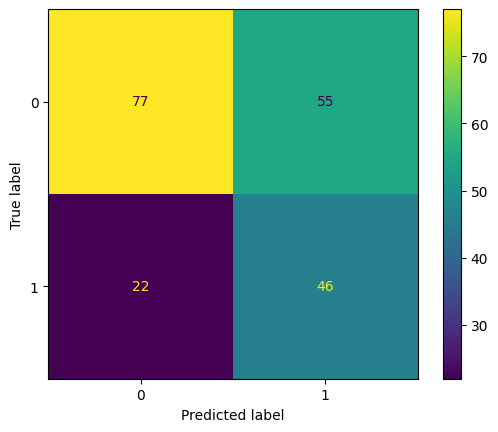

In [34]:
## For Stochastic Gradient Descent

print("Accuracy score: ", accuracy_score(y_t, prediction_t_sgd))
print("Precision score: ", precision_score(y_t, prediction_t_sgd))
print("Recall score: ", recall_score(y_t, prediction_t_sgd))
print("F1 score: ", f1_score(y_t, prediction_t_sgd))
print("ROC-AUC score: ", roc_auc_score(y_t, prediction_t_sgd))
print("Confusion matrix: \n", confusion_matrix(y_t, prediction_t_sgd))
cm = confusion_matrix(y_t, prediction_t_sgd)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Accuracy score:  0.605
Precision score:  0.44660194174757284
Recall score:  0.6764705882352942
F1 score:  0.5380116959064328
ROC-AUC score:  0.6223262032085561
Confusion matrix: 
 [[75 57]
 [22 46]]


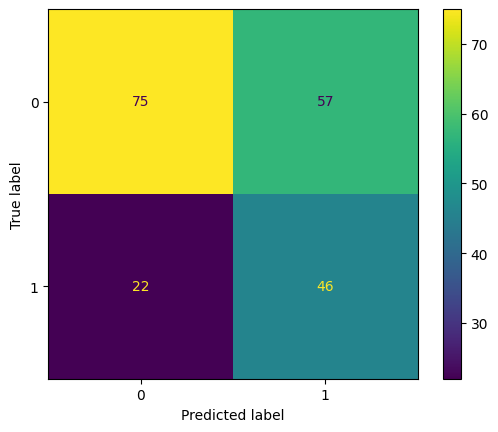

In [35]:
## For Batch Gradient Descent
print("Accuracy score: ", accuracy_score(y_t, prediction_t_batch))
print("Precision score: ", precision_score(y_t, prediction_t_batch))
print("Recall score: ", recall_score(y_t, prediction_t_batch))
print("F1 score: ", f1_score(y_t, prediction_t_batch))
print("ROC-AUC score: ", roc_auc_score(y_t, prediction_t_batch))
print("Confusion matrix: \n", confusion_matrix(y_t, prediction_t_batch))
cm = confusion_matrix(y_t, prediction_t_batch)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

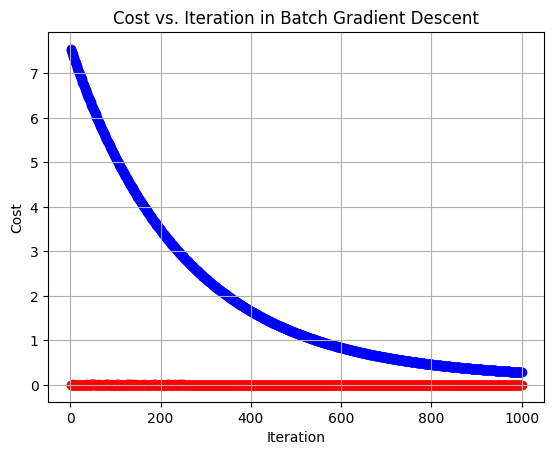

In [36]:
## Comparision
iterations = list(range(1, k + 1))
import matplotlib.pyplot as plt
plt.scatter(iterations, cost_batch,  color='blue')
plt.scatter(iterations, cost_sgd, color='red')

plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration in Batch Gradient Descent')
plt.grid(True)

plt.show()

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [37]:
def generate_polynomial_features(X, degree):
    """
    Generate polynomial features up to the specified degree.
    
    Parameters:
    - X: Input feature matrix (n_samples, n_features)
    - degree: Degree of the polynomial
    
    Returns:
    - X_poly: Feature matrix with polynomial features (n_samples, n_poly_features)
    """
    n_samples, n_features = X.shape
    X_poly = np.ones((n_samples, 1))
    
    for d in range(1, degree + 1):
        X_poly = np.hstack((X_poly, X ** d))
    
    return X_poly

In [38]:
X_poly = generate_polynomial_features(X, 12)
X_poly.shape

(800, 109)

In [39]:
def lasso_regression(X, y, degree, alpha, num_iterations, learning_rate):
    """
    Perform polynomial regression with Lasso regularization using gradient descent.
    
    Parameters:
    - X: Input feature matrix (n_samples, n_features)
    - y: Target values (n_samples,)
    - degree: Degree of the polynomial
    - alpha: L1 regularization strength
    - num_iterations: Number of gradient descent iterations
    - learning_rate: Learning rate for gradient descent
    
    Returns:
    - theta: Coefficients of the polynomial regression model (n_poly_features,)
    """
    costIteration = []
    n_samples, n_features = X.shape
    X_poly = generate_polynomial_features(X, degree)
    theta = np.zeros(X_poly.shape[1])

    for _ in range(num_iterations):
        # Compute the predictions
        y_pred = np.dot(X_poly, theta)
        
        # Compute the gradient with Lasso regularization
        gradient = (1 / n_samples) * np.dot(X_poly.T, (y_pred - y)) + (alpha / n_samples) * np.sign(theta)
        
        # Update the coefficients using gradient descent
        theta -= learning_rate * gradient
        cost = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2) + (alpha / n_samples) * np.sum(np.abs(theta))
        costIteration.append(cost)
    
    return theta, costIteration
    


In [40]:
degree = 3
alpha = 0.01
num_iterations = 1000
learning_rate = 0.01

theta, cost = lasso_regression(X, Y, degree, alpha, num_iterations, learning_rate)

print(theta)
print(cost)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/codespace/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_7779/4247296292.py", line 6, in <module>
    theta, cost = lasso_regression(X, Y, degree, alpha, num_iterations, learning_rate)
  File "/tmp/ipykernel_7779/436291449.py", line 26, in lasso_regression
    gradient = (1 / n_samples) * np.dot(X_poly.T, (y_pred - y)) + (alpha / n_samples) * np.sign(theta)
  File "/home/codespace/.local/lib/python3.10/site-packages/pandas/core/generic.py", line 2102, in __array_ufunc__
    return arraylike.array_ufunc(self, ufunc, method, *inputs, **kwargs)
  File "/home/codespace/.local/lib/python3.10/site-packages/pandas/core/arraylike.py", line 273, in array_ufunc
    result = maybe_dispatch_ufunc_to_dunder_op(self, ufunc, method, *inputs, **kwargs)
  File "ops_dispatch.pyx", line 113, in pandas._libs.ops_dispatch.maybe_dispatch